<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

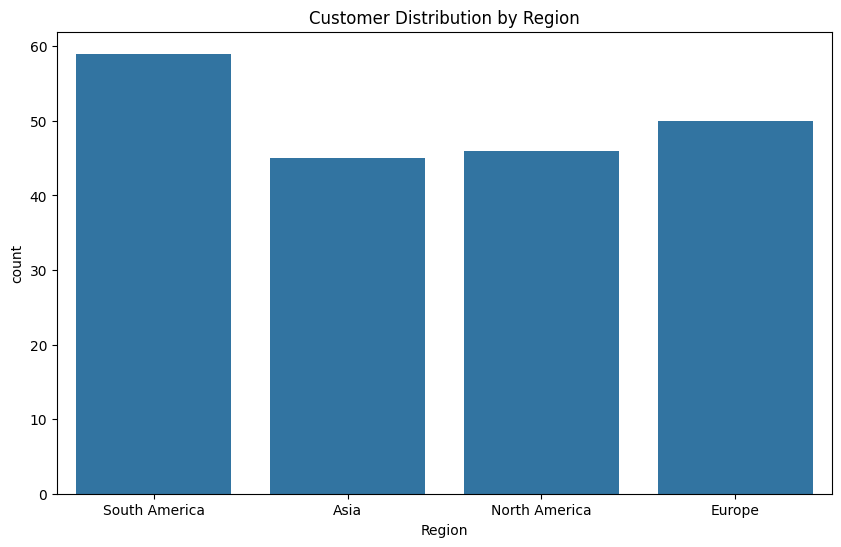

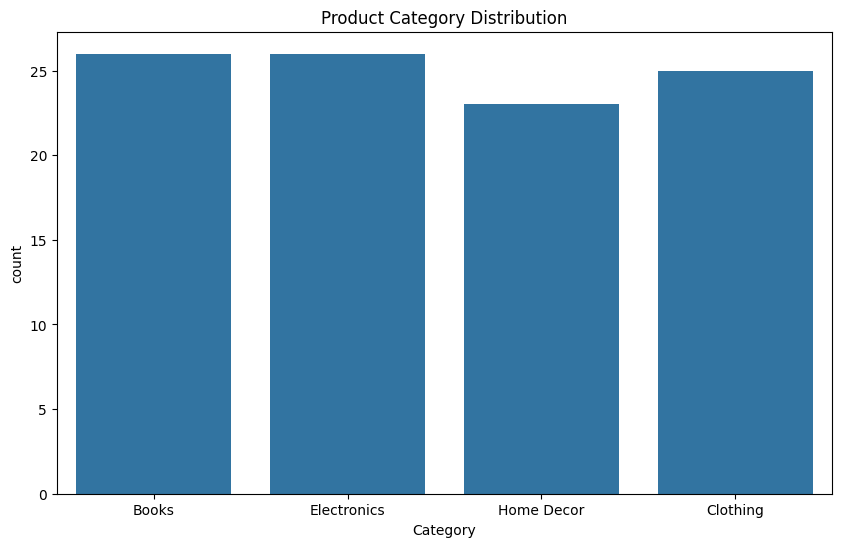

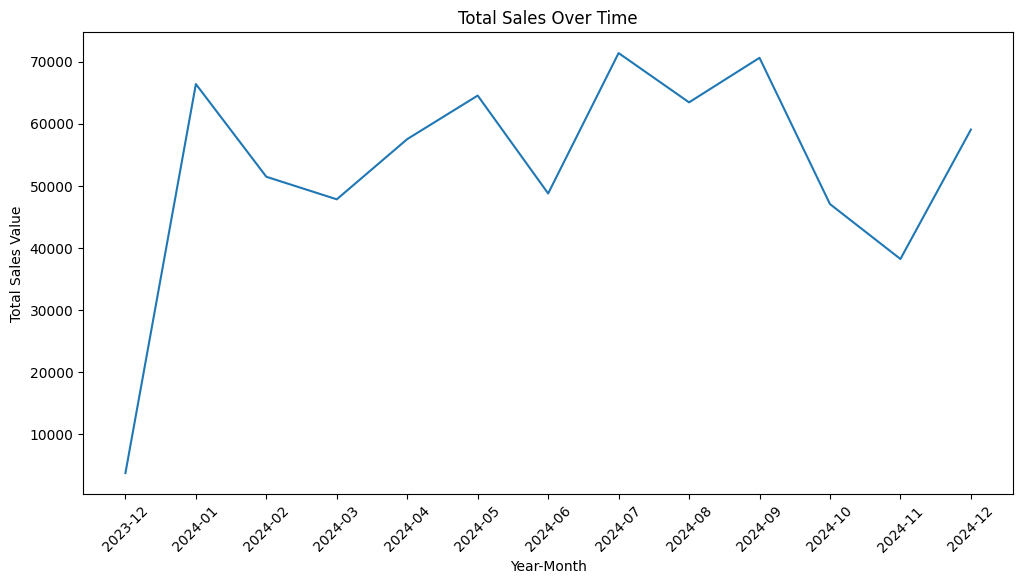

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display basic information
print(customers.info())
print(products.info())
print(transactions.info())

# Descriptive statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())

# Visualizations
# Customer distribution by region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

# Product category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x='Category')
plt.title('Product Category Distribution')
plt.show()

# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')

# Group by YearMonth and sum TotalValue
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum().reset_index()

# Convert YearMonth to string for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='TotalValue')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Value')
plt.show()